In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
from netCDF4 import Dataset
import pandas as pd
import properscoring as ps
import warnings
from utils.evaluation import plot_predictions
warnings.filterwarnings("ignore")

sns.set_style("white")
sns.set_palette(sns.color_palette("Paired"))

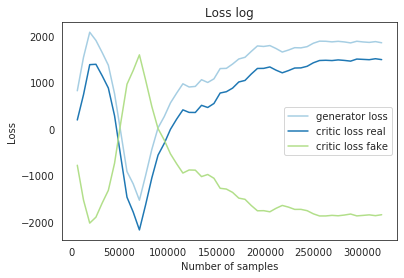

In [2]:
loss_log = pd.read_csv('/user/home/al18709/work/cgan/logs/log.txt', sep=",", header=None)[1:]
loss_log.columns = ['training_samples','disc_loss','disc_loss_real','disc_loss_fake','disc_loss_gp','gen_loss']
loss_log['training_samples'] = pd.to_numeric(loss_log['training_samples'],errors='coerce')
loss_log['gen_loss'] = pd.to_numeric(loss_log['gen_loss'],errors='coerce')
loss_log['disc_loss'] = pd.to_numeric(loss_log['disc_loss'],errors='coerce')
loss_log['disc_loss_real'] = pd.to_numeric(loss_log['disc_loss_real'],errors='coerce')
loss_log['disc_loss_fake'] = pd.to_numeric(loss_log['disc_loss_fake'],errors='coerce')


plt.plot(loss_log['training_samples'],loss_log['gen_loss'])
plt.plot(loss_log['training_samples'],loss_log['disc_loss_real'])
plt.plot(loss_log['training_samples'],loss_log['disc_loss_fake'])
plt.legend(labels=['generator loss','critic loss real','critic loss fake'])
plt.title('Loss log')
plt.xlabel('Number of samples')
plt.ylabel('Loss')
plt.savefig('figs/loss_log.png',bbox_inches='tight')


show


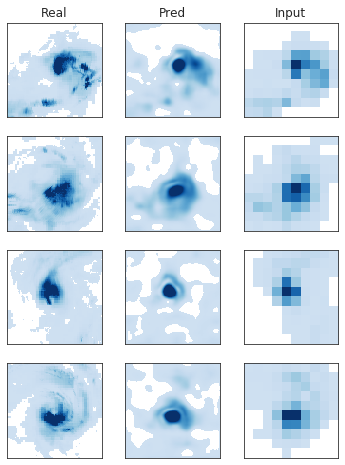

In [3]:
# set mode
mode = 'validation'

# load datasets
real = np.load('/user/home/al18709/work/cgan_predictions/%s_real.npy' % mode)[0][:,:,:,0]
pred = np.load('/user/home/al18709/work/cgan_predictions/%s_pred-0057600.npy' % mode)[0][:,:,:,0]
inputs = np.load('/user/home/al18709/work/cgan_predictions/%s_input.npy' % mode)[0][:,:,:,0]

plot_predictions(real,pred,inputs,plot='show')


In [5]:
import xe

print(pred.shape)

grid_out = xr.Dataset({'longitude': np.linspace(0, 100, 100),
			'latitude': np.linspace(-50, 50, 100)
			})
	# output grid has a the same coverage at finer resolution
grid_in = xr.Dataset({'longitude': np.linspace(0, 100, 10),
				'latitude': np.linspace(-50, 50, 10)
			})

regridder = xe.Regridder(grid_in, grid_out, 'conservative')

n_images,_,_ = pred.shape

tc = n.zeroes(n_images,10,10)
for i in range(n_images):
	tc[i,:,:] = regridder(pred[i,:,:])


ImportError: cannot import name 'path' from 'path' (/user/home/al18709/.conda/envs/alpine/lib/python3.7/site-packages/path/__init__.py)